<a href="https://colab.research.google.com/github/vinhbui123/machine_learning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

1.1. Apply LinearRegression to the dataset1. Report coefficients

In [40]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset1.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df1 = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df1.info(), df1.head()


Saving dataset1.csv to dataset1 (7).csv
Files in current directory: ['.config', 'dataset3.csv', 'dataset1 (5).csv', 'dataset1 (4).csv', 'dataset1 (6).csv', 'dataset1.csv', 'dataset3 (1).csv', 'dataset2.csv', 'dataset2 (1).csv', 'dataset2 (2).csv', 'dataset1 (2).csv', 'dataset1 (1).csv', 'dataset1 (3).csv', 'dataset1 (7).csv', 'dataset2 (3).csv', 'sample_data']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


(None,
    x  y
 0  1  1
 1  2  3
 2  4  3
 3  3  2
 4  5  5)

In [37]:
# Prepare the data
X = df1[['x']]
y = df1['y']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
explained_variance = metrics.explained_variance_score(y, y_pred)
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
msle = metrics.mean_squared_log_error(y, y_pred)
median_ae = metrics.median_absolute_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)

# Print results
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Explained Variance Score: {explained_variance}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Log Error (MSLE): {msle}")
print(f"Median Absolute Error: {median_ae}")
print(f"R² Score: {r2}")

Slope: 0.7999999999999999, Intercept: 0.3999999999999999
Explained Variance Score: 0.7272727272727273
Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.4800000000000001
Mean Squared Log Error (MSLE): 0.03567177967506894
Median Absolute Error: 0.6000000000000005
R² Score: 0.7272727272727273


1.2. Visualize the training set and predictions obtained from the above model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


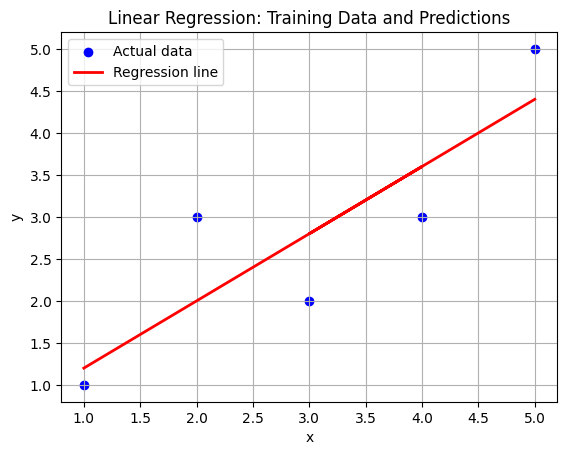

In [26]:
# Generate predictions
X_range = np.array(df1['x']).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot the training data
plt.scatter(df1['x'], df1['y'], color='blue', label='Actual data')

# Plot the regression line
plt.plot(df1['x'], y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Training Data and Predictions')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Task 2

2.1. Plot the relationship between combinations (i.e., x1 vs y,x2 vs y, x3 vs y)

In [33]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset2.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df2 = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df2.info(), df2.head()


Saving dataset2.csv to dataset2 (3).csv
Files in current directory: ['.config', 'dataset3.csv', 'dataset1 (5).csv', 'dataset1 (4).csv', 'dataset1.csv', 'dataset3 (1).csv', 'dataset2.csv', 'dataset2 (1).csv', 'dataset2 (2).csv', 'dataset1 (2).csv', 'dataset1 (1).csv', 'dataset1 (3).csv', 'dataset2 (3).csv', 'sample_data']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      599 non-null    int64  
 1   x1      599 non-null    float64
 2   x2      599 non-null    float64
 3   x3      599 non-null    float64
 4   y       599 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


(None,
    id       x1       x2       x3         y
 0   1  2.41710  0.83595  0.72469  18.21900
 1   2  1.98150 -1.01800 -1.06400   0.55271
 2   3  1.82850  0.49281 -0.89035   7.00510
 3   4  1.50480 -1.74070 -1.72290  -7.06310
 4   5  0.27489 -0.31811 -0.56168   0.74380)

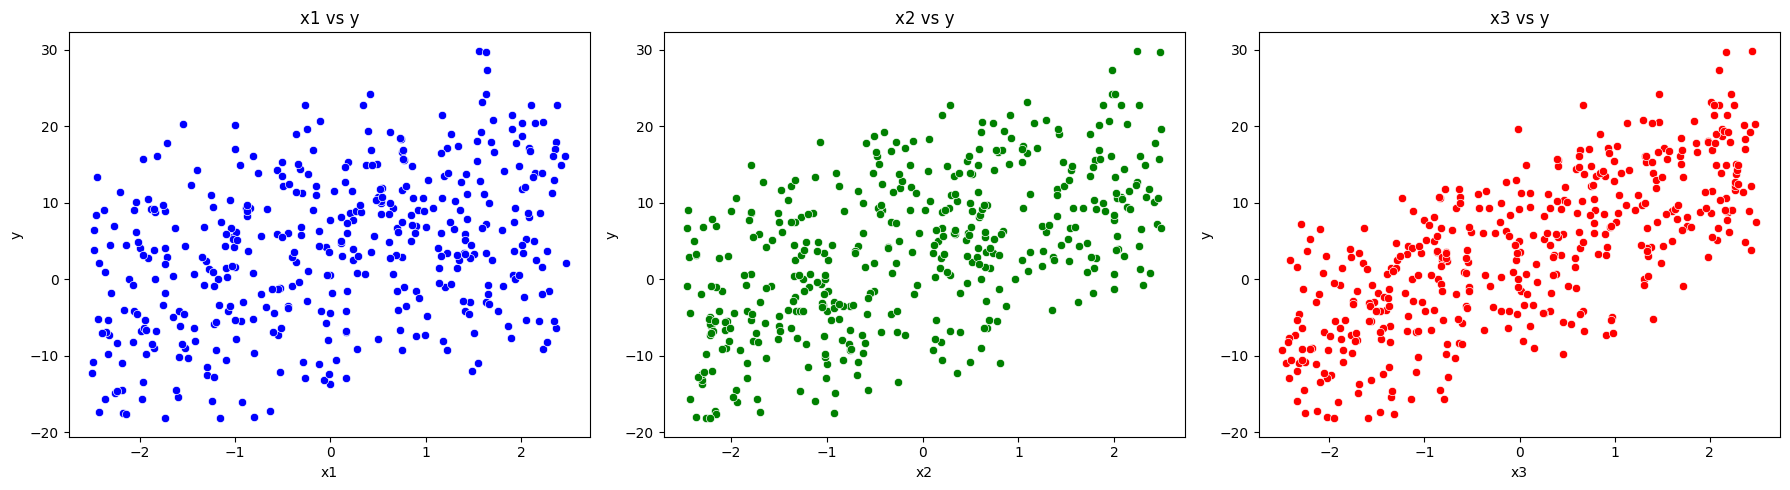

In [34]:
# Drop the 'id' column since it's not needed
df2 = df2.drop(columns=['id'])

# Split into training (70%) and test (30%) sets
train_df, test_df = train_test_split(df2, test_size=0.3, random_state=42)

# Plot the relationships between x1, x2, x3 and y
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=train_df["x1"], y=train_df["y"], color="blue")
axes[0].set_title("x1 vs y")

sns.scatterplot(ax=axes[1], x=train_df["x2"], y=train_df["y"], color="green")
axes[1].set_title("x2 vs y")

sns.scatterplot(ax=axes[2], x=train_df["x3"], y=train_df["y"], color="red")
axes[2].set_title("x3 vs y")

plt.tight_layout()
plt.show()


2.2. Plot the correlation between features using the heatmap

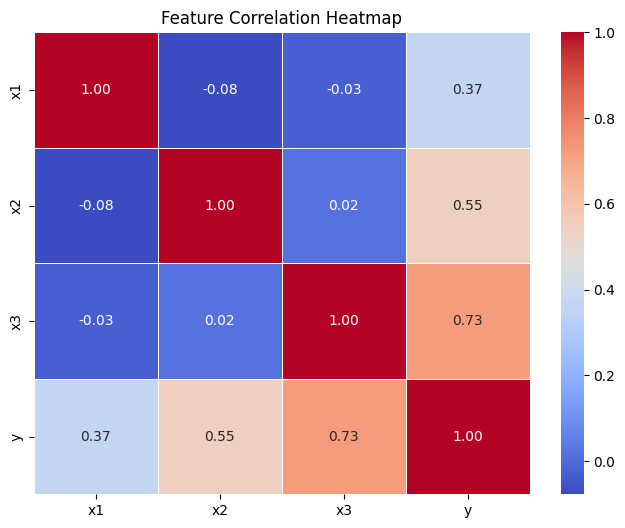

In [31]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


2.3. Apply LinearRegresion to each combination in the task 2.1

In [35]:
# Apply Linear Regression to each feature separately
results = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the intercept and coefficient
    results[feature] = (model.intercept_, model.coef_[0])

results


{'x1': (np.float64(3.7178569092247753), np.float64(2.551938933768129)),
 'x2': (np.float64(4.189433182774397), np.float64(3.847978018279782)),
 'x3': (np.float64(3.6285041227199355), np.float64(4.9797033243317586))}

2.4. Report the performance of the model trained in the task 2.3

In [41]:
# Evaluate performance for each feature separately
performance = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]
    X_test = test_df[[feature]]
    y_test = test_df["y"]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    performance[feature] = {"MSE": mse, "R²": r2}

performance

{'x1': {'MSE': 76.15433783733396, 'R²': 0.27710083004479535},
 'x2': {'MSE': 69.58401286817033, 'R²': 0.33946999510391096},
 'x3': {'MSE': 61.86057027053934, 'R²': 0.41278519160591465}}

Task 3

3.1

In [42]:
# Load the dataset (For Google Colab)
uploaded = files.upload()

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset3.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df = pd.read_csv(file_name, encoding=enc, sep = ';')
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df.info(), df.head()


Saving dataset3.csv to dataset3 (2).csv
Files in current directory: ['.config', 'dataset3.csv', 'dataset1 (5).csv', 'dataset1 (4).csv', 'dataset1 (6).csv', 'dataset1.csv', 'dataset3 (1).csv', 'dataset2.csv', 'dataset2 (1).csv', 'dataset2 (2).csv', 'dataset3 (2).csv', 'dataset1 (2).csv', 'dataset1 (1).csv', 'dataset1 (3).csv', 'dataset1 (7).csv', 'dataset2 (3).csv', 'sample_data']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   densi

(None,
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        